# Exercise 6
![image.png](../images/ex5.png)

In [1]:
from typing import TypedDict, Dict, List
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image
import random

In [2]:
class AgentState(TypedDict):
    player_name: str
    target_number: int
    guesses: List[int]
    attempts: int
    hint: str
    lower_bound: int
    upper_bound: int

In [ ]:
def setup_game(state: AgentState) -> AgentState:
    """Initialize the game with random target number and reset attempts."""
    state['player_name'] = f"Welcome, {state['player_name']}!"
    state['target_number'] = random.randint(1, 20)
    state['guesses'] = []
    state['attempts'] = 0
    state['hint'] = "The game has begun. I'm thinking of a number between 1 and 20."
    state['lower_bound'] = 1
    state['upper_bound'] = 20

    print(f"{state['player_name']} {state['hint']}")
    return state

In [4]:
def guess_node(state: AgentState) -> AgentState:
    """Generate a smarter guess based on previous hints."""

    possible_guesses = [i for i in range(state['lower_bound'], state['upper_bound'] + 1) if i not in state['guesses']]
    if possible_guesses:
        guess = random.choice(possible_guesses)
    else:
        guess = random.randint(1, 20)  # Fallback in case all numbers have been guessed

    state['guesses'].append(guess)
    state['attempts'] += 1
    print(f"Attempt {state['attempts']}: Guessing {guess} (Current range: {state['lower_bound']}-{state['upper_bound']})")
    
    return state

In [5]:
def hint_node(state: AgentState) -> AgentState:
    """Provide hints based on the guess."""
    last_guess = state['guesses'][-1]
    if last_guess < state['target_number']:
        state['hint'] = f"The number {last_guess} is too low. Try higher!"
        state['lower_bound'] = max(state['lower_bound'], last_guess + 1)
    elif last_guess > state['target_number']:
        state['hint'] = f"The number {last_guess} is too high. Try lower!"
        state['upper_bound'] = min(state['upper_bound'], last_guess - 1)
    else:
        state['hint'] = f"Correct! You found the number {state['target_number']} in {state['attempts']} attempts."
    
    print(f"Hint: {state['hint']}")
    return state

In [6]:
def should_continue(state: AgentState) -> str:
    """Decide whether to continue guessing."""
    last_guess = state['guesses'][-1]
    if last_guess == state['target_number']:
        print("Game Over: You've guessed the correct number!")
        return END
    elif state['attempts'] >= 7:
        print("Game Over: Maximum attempts reached. The number was", state['target_number'])
        return END
    else:
        print(f"Continuing to guess...\t{state['attempts']}/7 attempts used.")
        return 'guess'

In [7]:
graph = StateGraph(AgentState)

graph.add_node("setup", setup_game)
graph.add_node("guess", guess_node)
graph.add_node("hint", hint_node)

graph.add_edge(START, "setup")
graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint")

graph.add_conditional_edges(
    "hint", 
    should_continue, 
    ["guess", END]
)

app = graph.compile()

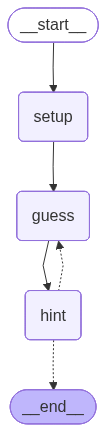

In [8]:
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
result = app.invoke({
    "player_name": "Student", 
})

Welcome, Student! The game has begun. I'm thinking of a number between 1 and 20.
Attempt 1: Guessing 3 (Current range: 1-20)
Hint: The number 3 is too low. Try higher!
Continuing to guess...	1/7 attempts used.
Attempt 2: Guessing 4 (Current range: 4-20)
Hint: The number 4 is too low. Try higher!
Continuing to guess...	2/7 attempts used.
Attempt 3: Guessing 6 (Current range: 5-20)
Hint: The number 6 is too low. Try higher!
Continuing to guess...	3/7 attempts used.
Attempt 4: Guessing 20 (Current range: 7-20)
Hint: The number 20 is too high. Try lower!
Continuing to guess...	4/7 attempts used.
Attempt 5: Guessing 10 (Current range: 7-19)
Hint: The number 10 is too low. Try higher!
Continuing to guess...	5/7 attempts used.
Attempt 6: Guessing 12 (Current range: 11-19)
Hint: The number 12 is too low. Try higher!
Continuing to guess...	6/7 attempts used.
Attempt 7: Guessing 14 (Current range: 13-19)
Hint: The number 14 is too low. Try higher!
Game Over: Maximum attempts reached. The number 